In [1]:
%pylab inline
import os, sys, glob
import time
import numpy as np
import pickle
import json

import matplotlib as mpl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load credential data 
from untappd_credentials import *

USER_NAME = 'ovarol'
#CLIENT_ID = "XXXXXXXXXXXXXX"
#CLIENT_SECRET = "XXXXXXXXXXXXXX"
#print 'Id:\t{}\nSecret:\t{}\n'.format(CLIENT_ID, CLIENT_SECRET)

In [3]:
# Using API from https://github.com/marshall91/pythonUntappd
import untappd_api as pythonUntappd

api = pythonUntappd.api(CLIENT_ID,CLIENT_SECRET)
userData = api.user_info(USER_NAME)['response']
#print json.dumps(userData, indent=4)

In [4]:
uniqueBeers = list()
userData = api.user_info(USER_NAME)['response']

count, keepCollect = 0, True
scanCount = 0
while keepCollect:
    resp = api.user_distinct_beers(USER_NAME, offset=count)['response']
    count += resp['beers']['count']
    uniqueBeers.extend(resp['beers']['items'])
    print('Unique beers collected: {}'.format(len(uniqueBeers)))
    scanCount += 1
    if resp['beers']['count'] != 0:
        time.sleep(1)
    else:
        break
        
with open('docs/data/{}_untappd_data.json'.format(USER_NAME),'w') as fl:
    fl.write(json.dumps({'user_data':userData, 'beer_data':uniqueBeers}))

Unique beers collected: 25
Unique beers collected: 50
Unique beers collected: 75
Unique beers collected: 100
Unique beers collected: 125
Unique beers collected: 150
Unique beers collected: 175
Unique beers collected: 200
Unique beers collected: 225
Unique beers collected: 250
Unique beers collected: 275
Unique beers collected: 300
Unique beers collected: 325
Unique beers collected: 350
Unique beers collected: 368
Unique beers collected: 368


In [8]:
#print json.dumps(uniqueBeers, indent=4, sort_keys=True)
print(json.dumps(uniqueBeers[-1], indent=4, sort_keys=True))

{
    "beer": {
        "auth_rating": 0,
        "beer_abv": 4.3,
        "beer_description": "Swirling clouds tumble as the storm begins to calm. Settle. Breathe in the moment, then break through the smooth, light head to the bittersweet reward.\n\nUnmistakeably GUINNESS, from the first velvet sip to the last, lingering drop. And every deep-dark satisfying mouthful in between.\n\nPure beauty. Pure GUINNESS.\n\nGuinness Draught is sold in kegs, widget cans, and bottles. The ABV varies from 4.1 to 4.3%.\n\nGuinness Extra Cold is the exact same beer only served through a super cooler at 3.5 \u00b0C",
        "beer_ibu": 45,
        "beer_label": "https://untappd.akamaized.net/site/beer_logos/beer-_4473_8122008947804818c90640a06d83.jpeg",
        "beer_name": "Guinness Draught",
        "beer_slug": "guinness-guinness-draught",
        "beer_style": "Stout - Irish Dry",
        "bid": 4473,
        "created_at": "Sat, 21 Aug 2010 09:26:35 +0000",
        "rating_count": 459090,
        "

In [5]:
# Check style counts
styleCounts = dict()
styleCountSimple = dict()
for b in uniqueBeers:
    if b['beer']['beer_style'] not in styleCounts:
        styleCounts[b['beer']['beer_style']] = 0
    styleCounts[b['beer']['beer_style']] += 1

    sstyle = b['beer']['beer_style'].split('-')[0].split('/')[0]
    if sstyle not in styleCountSimple:
        styleCountSimple[sstyle] = 0
    styleCountSimple[sstyle] += 1
    
for s in sorted(styleCountSimple, key=styleCountSimple.get, reverse=True):
    print(s, styleCountSimple[s])

Stout  111
Porter  37
IPA  37
Lager  20
Brown Ale  19
Pale Ale  14
Red Ale  10
Scotch Ale  7
Barleywine  6
Pumpkin  5
Sour  5
Pilsner  5
Hefeweizen 5
Pale Wheat Ale  5
Weizenbock 4
Belgian Strong Dark Ale 4
Saison  4
Belgian Quad 4
Cream Ale 4
Strong Ale  4
Fruit Beer 4
Belgian Tripel 3
Belgian Strong Golden Ale 3
Doppelbock  3
Shandy  3
Dark Ale 3
Spiced  3
Dunkelweizen 3
Märzen 3
Kölsch 3
Rye Beer 3
Blonde Ale 2
Scottish Ale 2
Kristallweizen  2
Smoked Beer 2
English Mild Ale 2
Kellerbier  2
Altbier 2
Scottish Export Ale 1
Old Ale 1
Blonde Ale  1
Maibock  1
Roggenbier 1
English Bitter 1
Gluten 1
Golden Ale 1
Schwarzbier 1
Witbier 1


In [6]:
# Most preferred brewery
breweryCount = dict()
for b in uniqueBeers:
    if b['brewery']['brewery_name'] not in breweryCount:
        breweryCount[b['brewery']['brewery_name']] = 0
    breweryCount[b['brewery']['brewery_name']] += 1

for s in sorted(breweryCount, key=breweryCount.get, reverse=True):
    print(s, breweryCount[s])

New Holland Brewing Company 17
Boston Beer Company 15
South Bend Brew Werks 15
Bell's Brewery 13
Upland Brewing Company 11
Bare Hands Brewery 8
Evil Czech Brewery 8
Stone Brewing 7
Great Lakes Brewing Company 7
Evil Twin Brewing 6
Left Hand Brewing Company 6
Silver Harbor Brewing 6
Founders Brewing Co. 6
Market Garden Brewery 6
Goshen Brewing Company 6
Dogfish Head Craft Brewery 5
Alltech Lexington Brewing & Distilling Co. 5
North Pier Brewing Company 5
Gordon Biersch Brewery Restaurant 5
Crooked Ewe Brewery 5
Boulevard Brewing Co. 4
Samuel Smith's Old Brewery 4
Jackalope Brewing Co. 4
The Tap Brewery 4
Anadolu Efes 4
Jaws Brewery 3
Short's Brewing Company 3
Ballast Point Brewing Company 3
Southern Tier Brewing Company 3
Sierra Nevada Brewing Co. 3
Forest & Main Brewing Company 3
Greenbush Brewing Company 3
Saugatuck Brewing Company 3
Quaff ON! Brewing Company 3
Rogue Ales & Spirits 3
Breckenridge Brewery 3
Charles Wells Brewery 3
Lagunitas Brewing Company 3
Goose Island Beer Co. 3
Bra

In [9]:
for b in sorted(uniqueBeers, key=lambda x: x['rating_score'], reverse=True)[:30]:
    print(b['brewery']['brewery_name'], b['beer']['beer_name'], b['rating_score'])

Southern Tier Brewing Company Crème Brûlée 4.75
Bell's Brewery Black Note Stout (2016) 4.75
Dogfish Head Craft Brewery Raison D'Extra 4.75
Alltech Lexington Brewing & Distilling Co. Kentucky Bourbon Barrel Barleywine 4.75
New Holland Brewing Company Pure Brews Porter 4.75
New Holland Brewing Company Dragon's Milk Reserve: With Basil 4.75
New Holland Brewing Company Dragon's Milk Reserve: Raspberry Lemon 4.75
Crooked Ewe Brewery Bourbon Barrel Aged Wendigo 4.75
Adnams Tally-Ho Reserve 2012 4.75
Upland Brewing Company Teddy Bear Kisses 4.75
New Holland Brewing Company Dragon's Milk 4.75
Desnoes & Geddes Dragon Stout 4.5
Guinness Guinness Foreign Extra Stout 4.5
Jaws Brewery Somnambula 4.5
Foolproof Brewing Company Revery 4.5
Base Camp Brewing Company S'more Stout 4.5
South Bend Brew Werks BQ4 Belgian Quad 4.5
Silver Harbor Brewing Cookie Monsta 4.5
North Pier Brewing Company Drake's Drum 4.5
Oskar Blues Brewery Ten FIDY 4.5
Heavy Seas Beer Yule Tide  (2016) 4.5
Stone Brewing Stone Xocove

Avg. IBU: 29.73641304347826
Avg. ABV: 6.903369565217392


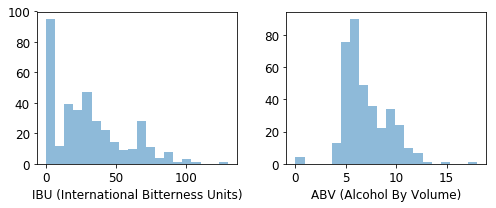

In [7]:
ibuList, abvList = list(), list()
for b in uniqueBeers:
    ibuList.append(b['beer']['beer_ibu'])
    abvList.append(b['beer']['beer_abv'])
    
print('Avg. IBU: {}'.format(np.mean(ibuList)))
print('Avg. ABV: {}'.format(np.mean(abvList)))

fig, axarr = plt.subplots(1, 2, figsize=(7,3))
axarr[0].hist(ibuList, bins=20, alpha=0.5, linewidth=0)
axarr[0].set_xlabel('IBU (International Bitterness Units)', fontsize=12)
axarr[0].tick_params(axis='both', which='major', labelsize=12)

axarr[1].hist(abvList, bins=20, alpha=0.5, linewidth=0)
axarr[1].set_xlabel('ABV (Alcohol By Volume)', fontsize=12)
axarr[1].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()


(368, 2)


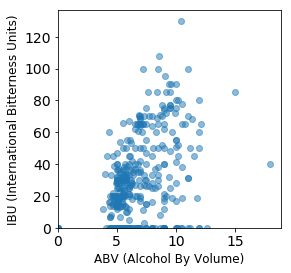

In [8]:
# Beer ABV vs IBU
beerMeasures = list()
for b in uniqueBeers:
    beerMeasures.append((b['beer']['beer_abv'],b['beer']['beer_ibu']))
beerMeasures = np.array(beerMeasures)
print(beerMeasures.shape)

fig = plt.figure(figsize=(4,4))
plt.scatter(beerMeasures[:,0], beerMeasures[:,1], alpha=0.5)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel('ABV (Alcohol By Volume)', fontsize=12)
plt.ylabel('IBU (International Bitterness Units)', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)

2.0 4.75


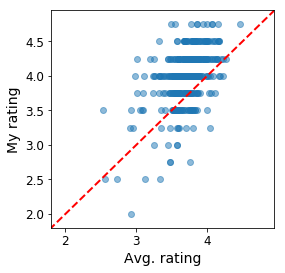

In [9]:
# Scatter plot of avg. ratings vs. my ratings
scatterData = list()
for b in uniqueBeers:
    if b['beer']['rating_score'] == 0:
        continue
    scatterData.append((b['beer']['rating_score'], b['rating_score']))
scatterData = np.array(scatterData)    

fig = plt.figure(figsize=(4,4))
plt.plot([0,5],[0,5],'r--', linewidth=2)
plt.scatter(scatterData[:,0], scatterData[:,1], alpha=0.5)

minV, maxV = np.min(scatterData), np.max(scatterData)
print(minV, maxV)
plt.xlim((minV-0.2, maxV+0.2))
plt.ylim((minV-0.2, maxV+0.2))
plt.xlabel('Avg. rating', fontsize=14)
plt.ylabel('My rating', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

(364, 3)


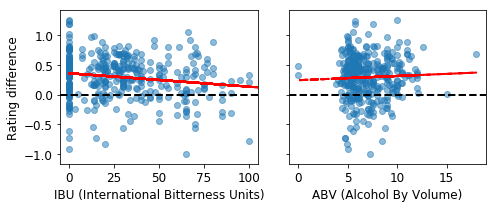

In [10]:
# What kind of beers I like more than avg. people
scatterData = list()
for b in uniqueBeers:
    if b['beer']['rating_score'] == 0:
        continue
    scatterData.append((b['rating_score'] - b['beer']['rating_score'], 
                        b['beer']['beer_abv'],
                        b['beer']['beer_ibu']))
scatterData = np.array(scatterData)    
print(scatterData.shape)

fig, axarr = plt.subplots(1, 2, figsize=(7,3), sharey=True)
axarr[0].scatter(scatterData[:,2], scatterData[:,0], alpha=0.5)
axarr[0].axhline(y=0, c='k', linewidth=2, linestyle='--')
fit = np.polyfit(scatterData[:,2], scatterData[:,0], 1)
fit_fn = np.poly1d(fit) 
axarr[0].plot(scatterData[:,2], fit_fn(scatterData[:,2]), 'r--', linewidth=2)
axarr[0].set_xlim(xmin=-5, xmax=105)
axarr[0].set_xlabel('IBU (International Bitterness Units)', fontsize=12)
axarr[0].set_ylabel('Rating difference', fontsize=12)
axarr[0].tick_params(axis='both', which='major', labelsize=12)

axarr[1].scatter(scatterData[:,1], scatterData[:,0], alpha=0.5)
axarr[1].axhline(y=0, c='k', linewidth=2, linestyle='--')
fit = np.polyfit(scatterData[:,1], scatterData[:,0], 1)
fit_fn = np.poly1d(fit) 
axarr[1].plot(scatterData[:,1], fit_fn(scatterData[:,1]), 'r--', linewidth=2)
axarr[1].set_xlim(xmin=-1, xmax=max(scatterData[:,1])+1)
axarr[1].set_xlabel('ABV (Alcohol By Volume)', fontsize=12)
axarr[1].tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()


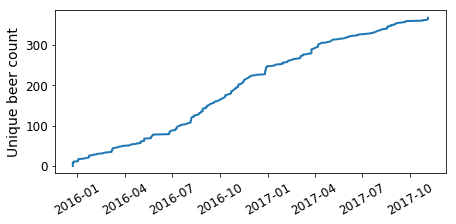

In [11]:
# Cumulative beer discoveries
dTimes = list()
for b in uniqueBeers:
    dTimes.append(datetime.datetime.strptime(b['first_created_at'].split(' -')[0],
                                             '%a, %d %b %Y %H:%M:%S'))
dTimes.sort()
    
fig = plt.figure(figsize=(7,3))
plt.plot(dTimes, range(len(dTimes)), linewidth=2)
plt.ylabel('Unique beer count', fontsize=14)
plt.xticks(rotation=30)
plt.tick_params(axis='both', which='major', labelsize=12)